# **Kmeans**
Un algoritmo de clustering o agrupamiento utilizado para dividir un conjunto de datos en 𝑘 grupos o clústeres. Es un algoritmo de aprendizaje no supervisado, lo que significa que los datos no necesitan tener etiquetas o clasificaciones previas; el objetivo es agrupar los datos de manera que los elementos dentro de cada grupo sean similares entre sí y distintos de los elementos de otros grupos.

What is clustering? What is classification?

When do we use clustering and classification?

How do we use clustering with K-means?

Which is the difference between K-means and K-means ++?

¿Qué es clustering? ¿Qué es clasificación?

Clustering (agrupamiento) es una técnica de aprendizaje no supervisado que organiza datos sin etiquetas en grupos o clústeres, de manera que los elementos dentro de un clúster son más similares entre sí que a los de otros clústeres. Se utiliza cuando queremos descubrir patrones o grupos naturales en los datos.

Clasificación es una técnica de aprendizaje supervisado que organiza datos en categorías o clases predefinidas. En este caso, los datos tienen etiquetas conocidas, y el objetivo es entrenar un modelo que pueda predecir la clase de nuevos datos basándose en lo aprendido.

¿Cuándo usamos clustering y clasificación?
Clustering se usa cuando no se tiene información previa o etiquetas sobre los grupos en los datos. Es útil en exploración de datos, segmentación de clientes, o análisis de patrones en grandes volúmenes de datos sin etiquetas.

Clasificación se usa cuando se conocen las clases a las que deben pertenecer los datos. Es común en tareas como detección de fraude, diagnóstico médico, clasificación de correos electrónicos (spam o no spam), y reconocimiento de imágenes.

¿Cómo usamos clustering con K-means?
En K-means, el objetivo es dividir los datos en
𝑘
k clústeres o grupos:

Se eligen
𝑘
k puntos iniciales como centros de los clústeres.
Cada punto en el conjunto de datos se asigna al centro de clúster más cercano.
Se recalculan los centros basados en el promedio de los puntos asignados a cada clúster.
Los pasos se repiten hasta que los centros de los clústeres dejen de cambiar significativamente.
Este proceso permite agrupar los datos en
𝑘
k clústeres de forma iterativa.

¿Cuál es la diferencia entre K-means y K-means++?
K-means inicializa los centroides de manera aleatoria, lo que puede llevar a una convergencia en clústeres de baja calidad, especialmente si los datos tienen una estructura compleja.

K-means++ mejora esta inicialización al elegir los centroides iniciales de manera que estén más espaciados entre sí. Esto suele mejorar la calidad de los clústeres, reduce la variabilidad en los resultados y acelera la convergencia, especialmente en datos complejos.

En resumen, K-means++ es una mejora del algoritmo K-means que hace que el proceso de agrupamiento sea más efectivo y eficiente.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
clients = pd.DataFrame(
    {
        "saldo": [
            750,
            1245,
            230,
            533,
            490,
            1000,
            190,
            900,
            600,
            50,
            1100,
            930,
            450,
            330,
            750,
        ],
        "transacciones": [
            3,
            1,
            4,
            3,
            2,
            1,
            0,
            3,
            2,
            1,
            0,
            4,
            3,
            2,
            0,
        ],
    }
)

In [3]:
scaler = MinMaxScaler().fit(clients.values)
clients = pd.DataFrame(
    scaler.transform(clients.values), columns=["saldo", "transacciones"]
)
print(clients)

       saldo  transacciones
0   0.585774           0.75
1   1.000000           0.25
2   0.150628           1.00
3   0.404184           0.75
4   0.368201           0.50
5   0.794979           0.25
6   0.117155           0.00
7   0.711297           0.75
8   0.460251           0.50
9   0.000000           0.25
10  0.878661           0.00
11  0.736402           1.00
12  0.334728           0.75
13  0.234310           0.50
14  0.585774           0.00


In [4]:
kmeans = KMeans(n_clusters=5).fit(clients.values)
print(kmeans.labels_)

[0 3 1 1 1 3 4 0 1 4 3 0 1 1 2]


In [5]:
clients["cluster"] = kmeans.labels_
print(kmeans.cluster_centers_, kmeans.inertia_)

[[0.67782427 0.83333333]
 [0.32538354 0.66666667]
 [0.58577406 0.        ]
 [0.89121339 0.16666667]
 [0.05857741 0.125     ]] 0.4292109075471367


       saldo  transacciones  cluster
0   0.585774           0.75        0
1   1.000000           0.25        3
2   0.150628           1.00        1
3   0.404184           0.75        1
4   0.368201           0.50        1
5   0.794979           0.25        3
6   0.117155           0.00        4
7   0.711297           0.75        0
8   0.460251           0.50        1
9   0.000000           0.25        4
10  0.878661           0.00        3
11  0.736402           1.00        0
12  0.334728           0.75        1
13  0.234310           0.50        1
14  0.585774           0.00        2


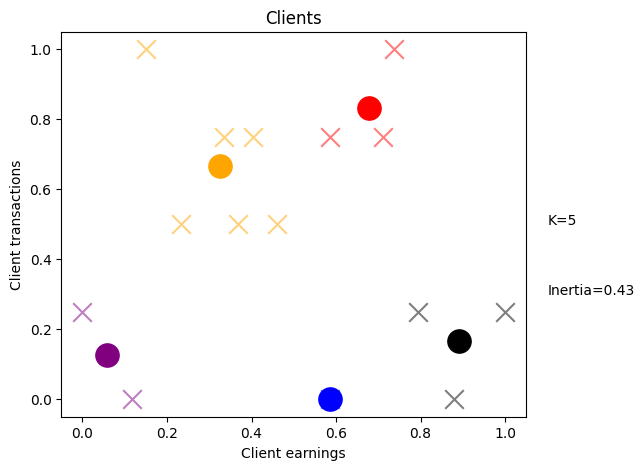

In [6]:
plt.figure(figsize=(6, 5), dpi=100)
colors = ["red", "orange", "blue", "black", "purple", "pink", "brown"]
print(clients)
for cluster in range(kmeans.n_clusters):
    plt.scatter(
        clients[clients["cluster"] == cluster]["saldo"],  # Pandas dataframe filter
        clients[clients["cluster"] == cluster][
            "transacciones"
        ],  # Pandas dataframe filter
        marker="x",
        s=180,
        color=colors[cluster],
        alpha=0.5,
    )
    plt.scatter(
        kmeans.cluster_centers_[cluster][0],
        kmeans.cluster_centers_[cluster][1],
        marker="o",
        s=280,
        color=colors[cluster],
    )
plt.title("Clients")
plt.xlabel("Client earnings")
plt.ylabel("Client transactions")
plt.text(1.1, 0.5, "K={}".format(kmeans.n_clusters))
plt.text(1.1, 0.3, "Inertia={}".format(round(kmeans.inertia_,2)))
plt.show()